In [18]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.layers.convolutional import MaxPooling2D, Conv2D


import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
print('x_train : ', x_train.shape)
print('y_train : ', y_train.shape)
print('x_test : ', x_test.shape)
print('y_test : ', y_test.shape)


x_train :  (60000, 28, 28)
y_train :  (60000,)
x_test :  (10000, 28, 28)
y_test :  (10000,)


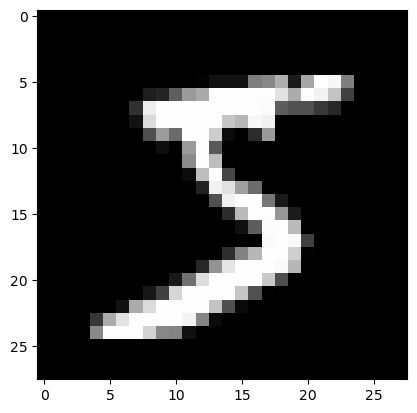

In [8]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [11]:
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

print('x_train : ', x_train.shape)
print('x_test : ', x_test.shape)

x_train :  (60000, 28, 28, 1)
x_test :  (10000, 28, 28, 1)


In [14]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [17]:
x_train, x_test = x_train / 255, x_test / 255

In [21]:
def convnet():
    model = Sequential()
    model.add(Conv2D(32, (5,5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(16, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    
    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='softmax'))
    
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [22]:
model = convnet()

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               40100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

In [24]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=8, 
                    validation_split=0.2, 
                    batch_size=256, 
                    verbose=1,
                    shuffle=True)

Epoch 1/8
188/188 [==============================] - 21s 111ms/step - loss: 0.2821 - accuracy: 0.9120 - val_loss: 0.0678 - val_accuracy: 0.9784
Epoch 2/8
188/188 [==============================] - 19s 100ms/step - loss: 0.1140 - accuracy: 0.9660 - val_loss: 0.0549 - val_accuracy: 0.9835
Epoch 3/8
188/188 [==============================] - 18s 97ms/step - loss: 0.0905 - accuracy: 0.9729 - val_loss: 0.0453 - val_accuracy: 0.9873
Epoch 4/8
188/188 [==============================] - 19s 99ms/step - loss: 0.0822 - accuracy: 0.9752 - val_loss: 0.0577 - val_accuracy: 0.9840
Epoch 5/8
188/188 [==============================] - 19s 102ms/step - loss: 0.0765 - accuracy: 0.9772 - val_loss: 0.0511 - val_accuracy: 0.9864
Epoch 6/8
188/188 [==============================] - 18s 97ms/step - loss: 0.0697 - accuracy: 0.9797 - val_loss: 0.0520 - val_accuracy: 0.9862
Epoch 7/8
188/188 [==============================] - 16s 83ms/step - loss: 0.0670 - accuracy: 0.9806 - val_loss: 0.0595 - val_accuracy: 0.9

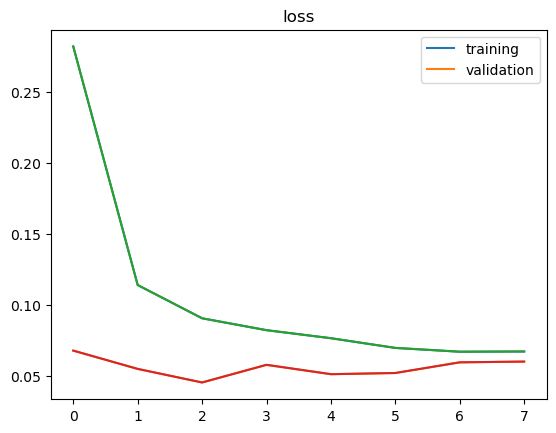

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.legend(['training', 'validation'])
plt.show()

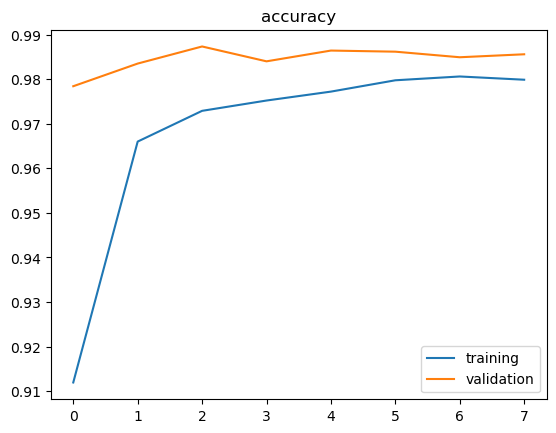

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['training', 'validation'])
plt.show()

In [29]:
score = model.evaluate(x_test, y_test, verbose=0)

In [30]:
print('error', score[0])
print('accuracy', score[1])

error 0.04562120884656906
accuracy 0.9871000051498413


In [31]:
model.save('CNN_convnet.h5')